In [1]:
import matplotlib.pyplot as plt

In [2]:
import math

In [3]:
import numpy as np

In [11]:
def simulation_of_mass_meteor(m0,y0,v0,pairaty0,T,s,H):
    '''function that can shows the mass of the meteor over time, for a sputtering term of zero
    b0 is not a constant anymore, as it changes with mass'''
    dt = 0.1
    tlist = []
    ylist = []
    mlist = []
    vlist = []
    t0 = 0
    t = t0
    pair = pairaty0
    y = y0
    v= v0
    m = m0
    f = (-3.35*(10**10))/(T**(1/2)) * math.e**(-5.78*(10**4)/T)
    b0list = []
    blist=[]
    for i in range(1000):
        pair = pairaty0*math.e**(-y/H)
        b0 = (1.21 * pair)/(m**(1/3)*T**(2/3))
        b = b0 * math.e ** (-y/H)
        blist.append(b)
        b0list.append(b0)
        dt1 = abs(0.01/(-b*v))
        dt2 = abs((0.01*m**(1/3))/(f-(s*pair)*(v**3)))
        dt3 = abs(0.01*y)/abs(v)
        dt = min(dt1,dt2,dt3)
        t = t + dt
        if t > 4:
            break
        dy = -v * dt
        y = y + dy
        dm = (f * m**(2/3)- (s * m**(2/3) * pair * (v**3))) * dt
        m = m + dm
        if m < 0:
            break
        dv = -b * (v ** 2) * dt
        v = v + dv
        tlist.append(t)
        ylist.append(y)
        vlist.append(v)
        #changing the mass to micrograms
        mlist.append(m*10**9)
    return(tlist,b0list,ylist,mlist,vlist)

Text(0.5, 1.0, 'Mass of Meteor vs Time')

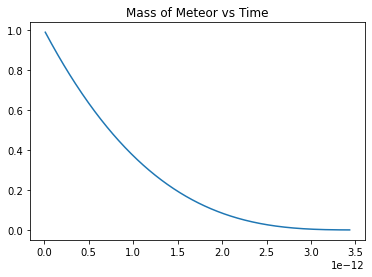

In [12]:
tlist,b0list,ylist,mlist,vlist = simulation_of_mass_meteor(1*(10**-9),120000,45000,1.5,1000,1,10000)
plt.plot(tlist,mlist)
plt.title("Mass of Meteor vs Time")

Text(0, 0.5, 'Position of Meteor')

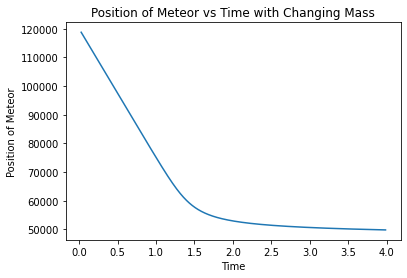

In [13]:
tlist,b0list,ylist,mlist,vlist = simulation_of_mass_meteor(1*(10**-9),120000,45000,1.5,1000,0,10000)
plt.plot(tlist,ylist)
plt.title("Position of Meteor vs Time with Changing Mass")
plt.xlabel("Time")
plt.ylabel("Position of Meteor")

Text(0.5, 1.0, 'Velocity vs Time with Changing Mass')

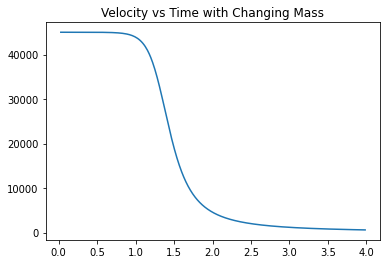

In [14]:
plt.plot(tlist,vlist)
plt.title("Velocity vs Time with Changing Mass")

Text(0.5, 1.0, 'Velocity vs Position of Meteor with Mass Taken into Account')

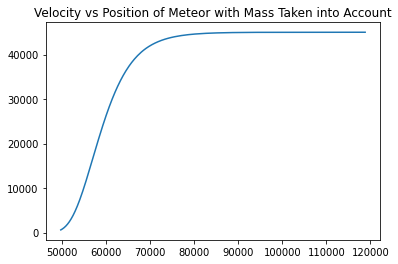

In [15]:
plt.plot(ylist,vlist)
plt.title("Velocity vs Position of Meteor with Mass Taken into Account")

Text(0, 0.5, 'Velocity (meters per second)')

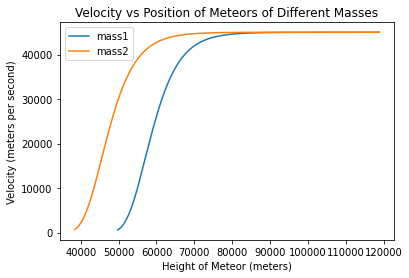

In [16]:
#trying to plot velocity vs position with different starting mass
tlist,b0list,ylist,mlist,vlist = simulation_of_mass_meteor(1*(10**-9),120000,45000,1.5,1000,0,10000)
plt.plot(ylist,vlist,label="mass1")
tlist,b0list,ylist,mlist,vlist = simulation_of_mass_meteor(1*(10**-6),120000,45000,1.5,1000,0,10000)
plt.plot(ylist,vlist,label="mass2")
plt.legend()
plt.title("Velocity vs Position of Meteors of Different Masses")
plt.xlabel("Height of Meteor (meters)")
plt.ylabel("Velocity (meters per second)")

In [17]:
def theory_non_constant_mass(m0,y0,v0,pairaty0,T,H):
    '''function that takes into consideration that mass is changing. 
    This theory was derived with a sputtering term of zero'''
    ttheorylist=[]
    mtheorylist=[]
    t0 = 0
    t = t0
    m = m0
    f = (-3.35*(10**10))/(T**(1/2)) * math.e**(-5.78*(10**4)/T)
    dt = 0.01
    for i in range(400): 
        t = t + dt
        ttheorylist.append(t)
        m = (m0**(1/3)+(f*t)/3)**3
        mtheorylist.append(m*(10**9))
    return[ttheorylist,mtheorylist]

Text(0, 0.5, 'Mass in Micrograms')

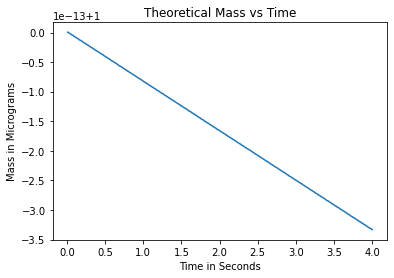

In [18]:
ttheorylist,mtheorylist=theory_non_constant_mass(1*(10**-9),120000,45000,1.5,1000,10000)
plt.plot(ttheorylist,mtheorylist)
plt.title("Theoretical Mass vs Time")
plt.xlabel("Time in Seconds")
plt.ylabel("Mass in Micrograms")

Text(0, 0.5, 'Mass of Meteor')

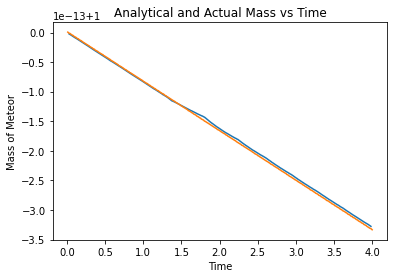

In [19]:
#plotting theoretical and simulation of mass on the same graph to compare
tlist,b0list,ylist,mlist,vlist = simulation_of_mass_meteor(1*(10**-9),120000,45000,1.5,1000,0,10000)
plt.plot(tlist,mlist,label="Simulation")
ttheorylist,mtheorylist=theory_non_constant_mass(1*(10**-9),120000,45000,1.5,1000,10000)
plt.plot(ttheorylist,mtheorylist,label="Theoretical")
plt.title("Analytical and Actual Mass vs Time")
plt.xlabel("Time")
plt.ylabel("Mass of Meteor")

In [134]:
#now taking into consideration that temperautre is changing
def simulation_temp_meteor(m0,y0,v0,pairaty0,temp0,s,H,tempa):
    tlist = []
    ylist = []
    mlist = []
    vlist = []
    templist = []
    t0 = 0
    t = t0
    pair = pairaty0
    y = y0
    v= v0
    m = m0
    b0list = []
    blist = []
    temp = temp0
    for i in range(1000):
        pair = pairaty0*math.e**(-y/H)
        b0 = (1.21 * pair)/(m**(1/3)*temp**(2/3))
        b = b0 * math.e ** (-y/H)
        f = (-3.35*(10**10))/(temp**(1/2)) * math.e**(-5.78*(10**4)/temp)
        #next are used for solving for temperature
        A = 8264*(m**(1/3))
        B = (1/2)*(pair)*(v**3)
        C = (2.27*(10**-7))*((temp**4)-(tempa**4))
        D = ((6*(10**8))/(1.21*(m**(2/3)))) * (f * m**(2/3)- (s * m**(2/3) * pair * (v**3)))
        dt1 = abs(0.01/(-b*v))
        dt2 = abs((0.01*m**(1/3))/(f-(s*pair)*(v**3)))
        dt3 = abs(0.01*y)/abs(v)
        dt4 = abs((0.01*temp*A)/(B-C+D))
        dt = min(dt1,dt2,dt3,dt4)
        t = t + dt
        if t > 4:
            break
        #finding the temperature
        dtemp = ((B-C+D)/A)* dt
        temp = temp + dtemp
        dy = -v * dt
        y = y + dy
        dm = (f * m**(2/3)- (s * m**(2/3) * pair * (v**3))) * dt
        m = m + dm
        dv = -b * (v ** 2) * dt
        v = v + dv
        tlist.append(t)
        templist.append(temp)
        ylist.append(y)
        vlist.append(v)
        #changing the mass to micrograms
        mlist.append(m*10**9)
    return(tlist,ylist,mlist,vlist,templist)

Text(0.5, 1.0, 'Temperature vs Time')

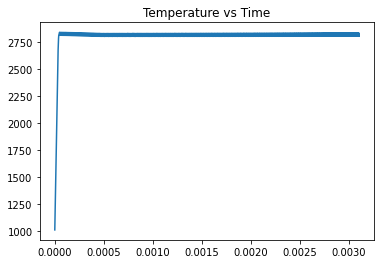

In [136]:
tlist,ylist,mlist,vlist,templist = simulation_temp_meteor(1*(10**-9),120000,45000,1.5,1000,0,10000,300)
plt.plot(tlist,templist)
plt.title("Temperature vs Time")

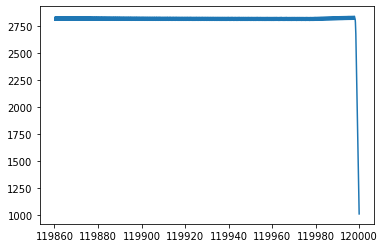

In [137]:
plt.plot(ylist,templist)